      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


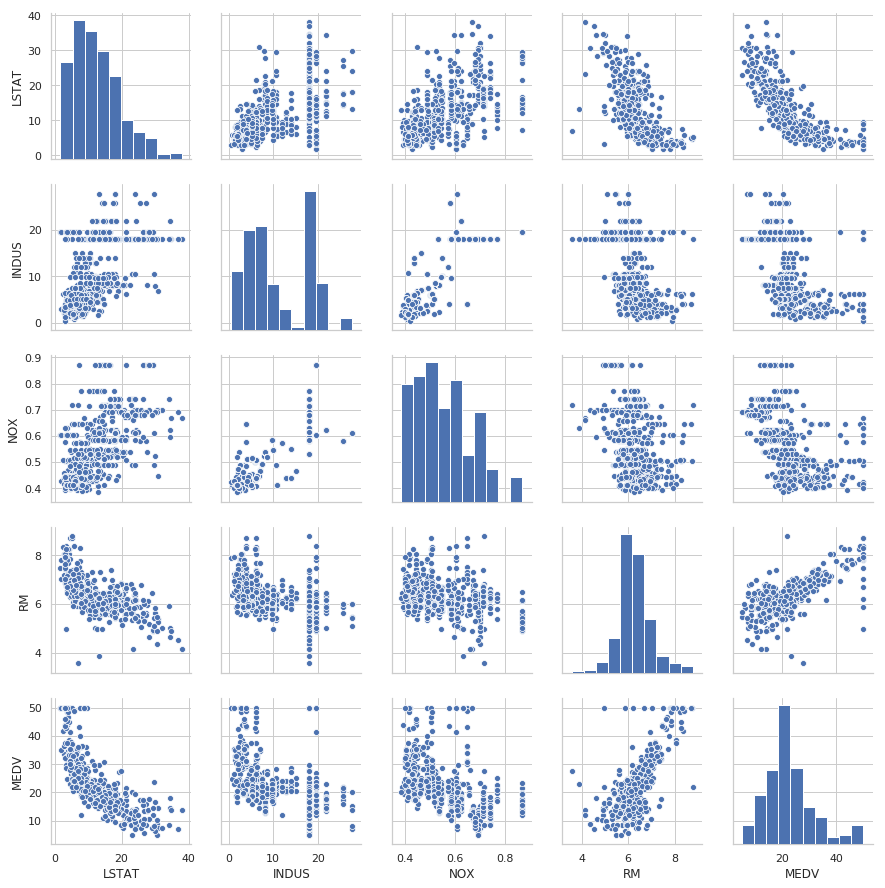

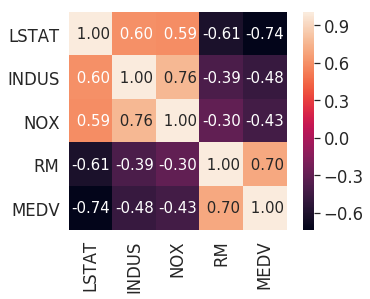

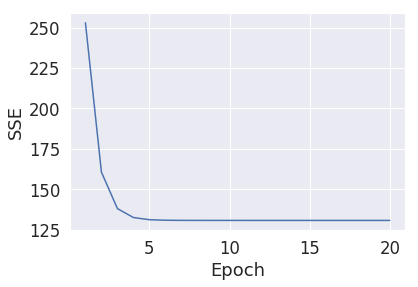

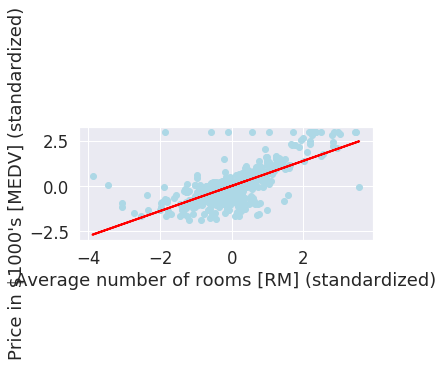

Slope: 0.695
Intercept: -0.000
Price in $1000's: 10.840


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

class LinearRegressionGD(object):

	def __init__(self,eta=0.001,n_iter=20):
		self.eta = eta
		self.n_iter = n_iter

	def fit(self, X, y):
		self.w_ = np.zeros(1 + X.shape[1])
		self.cost_ = []
		for i in range(self.n_iter):
			output = self.net_input(X)
			errors = (y - output)
			self.w_[1:] = self.w_[1:] + (self.eta * X.T.dot(errors))
			self.w_[0] = self.w_[0] + (self.eta * errors.sum())
			cost = (errors**2).sum() / 2.0
			self.cost_.append(cost)
		return self

	def net_input(self, X):
		return np.dot(X, self.w_[1:]) + self.w_[0]

	def predict(self, X):
		return self.net_input(X)

def lin_regplot(X, y, model):
    plt.scatter(X, y, c='lightblue')
    plt.plot(X, model.predict(X), color='red', linewidth=2)    
    return 

#1

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
				 header=None, sep='\s+')
df.columns = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
			 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

print(df.head())

# 2

sns.set(style='whitegrid', context='notebook')
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], height=2.5);
plt.show()
#buscar el mas lineal en el resultado

#3
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1.5)
hm = sns.heatmap(cm,cbar=True,
				 annot=True,
				 square=True,
				 fmt = ' .2f',
				 annot_kws= {'size':15} ,
				 yticklabels = cols,
				 xticklabels = cols)
#Done

plt.show()

#4

X = df[['RM']].values
y = df['MEDV'].values
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000\'s [MEDV] (standardized)')
plt.tight_layout()
# plt.savefig('./figures/gradient_fit.png', dpi=300)
plt.show()
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])
num_rooms_std = sc_x.transform(np.array([[5.0]]))
price_std = lr.predict(num_rooms_std)
print("Price in $1000's: %.3f" % sc_y.inverse_transform(price_std))

